In [15]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot

     | 112kB 2.8MB/s
  Running setup.py bdist_wheel for pygsheets ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-ccajiklo/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets


In [16]:
#authorize 1
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp0kgy6g13/pubring.gpg' created
gpg: /tmp/tmp0kgy6g13/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [0]:
#authorize 2
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygsheets

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [20]:
#accessing the drive
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
#loading the google sheets
gc = pygsheets.authorize(outh_file='drive/Colab Notebooks/client_secret_430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com.json',outh_nonlocal=True)

In [0]:
# Open spreadsheet and then workseet
sh = gc.open('intializer analysis')
wks = sh.Sheet1

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [24]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X = df.iloc[:,0:8] #independent variable
Y = df.iloc[:,8] #dependent variable

In [0]:
funct = []
funct.append('zeros')
funct.append('ones')
funct.append('RandomNormal')
funct.append('RandomUniform')
funct.append('lecun_uniform')
funct.append('lecun_normal')
funct.append('glorot_normal')
funct.append('glorot_uniform')

In [31]:
analysisdf = pd.DataFrame(columns= ["kernel_initializer",
                                    "accuracy"])
rownumber = 0
analysisdf  

,kernel_initializer,accuracy


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 592us/step - loss: 0.6928 - acc: 0.6542 - val_loss: 0.6923 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 91us/step - loss: 0.6918 - acc: 0.6542 - val_loss: 0.6913 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 87us/step - loss: 0.6908 - acc: 0.6542 - val_loss: 0.6904 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 102us/step - loss: 0.6897 - acc: 0.6542 - val_loss: 0.6894 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 90us/step - loss: 0.6887 - acc: 0.6542 - val_loss: 0.6885 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 91us/step - loss: 0.6877 - acc: 0.6542 - val_loss: 0.6876 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 89us/step - loss: 0.6868 - acc: 0.6542 - val_loss: 0.6867 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 87us/step - loss: 0.6712 - acc: 0.6542 - val_loss: 0.6728 - val_acc: 0.6429
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.6706 - acc: 0.6542 - val_loss: 0.6722 - val_acc: 0.6429
Epoch 29/150
613/613 [==============================] - 0s 90us/step - loss: 0.6700 - acc: 0.6542 - val_loss: 0.6716 - val_acc: 0.6429
Epoch 30/150
613/613 [==============================] - 0s 95us/step - loss: 0.6694 - acc: 0.6542 - val_loss: 0.6711 - val_acc: 0.6429
Epoch 31/150
613/613 [==============================] - 0s 95us/step - loss: 0.6687 - acc: 0.6542 - val_loss: 0.6706 - val_acc: 0.6429
Epoch 32/150
613/613 [==============================] - 0s 93us/step - loss: 0.6682 - acc: 0.6542 - val_loss: 0.6700 - val_acc: 0.6429
Epoch 33/150
613/613 [==============================] - 0s 98us/step - loss: 0.6676 - acc: 0.6542 - val_loss: 0.6695 - val_acc: 0.6429
Epoch 34/150
613/613 [==============================] - 0s 115us/ste

Epoch 50/150
613/613 [==============================] - 0s 105us/step - loss: 0.6595 - acc: 0.6542 - val_loss: 0.6624 - val_acc: 0.6429
Epoch 51/150
613/613 [==============================] - 0s 105us/step - loss: 0.6590 - acc: 0.6542 - val_loss: 0.6621 - val_acc: 0.6429
Epoch 52/150
613/613 [==============================] - 0s 96us/step - loss: 0.6587 - acc: 0.6542 - val_loss: 0.6617 - val_acc: 0.6429
Epoch 53/150
613/613 [==============================] - 0s 100us/step - loss: 0.6583 - acc: 0.6542 - val_loss: 0.6614 - val_acc: 0.6429
Epoch 54/150
613/613 [==============================] - 0s 122us/step - loss: 0.6579 - acc: 0.6542 - val_loss: 0.6611 - val_acc: 0.6429
Epoch 55/150
613/613 [==============================] - 0s 100us/step - loss: 0.6575 - acc: 0.6542 - val_loss: 0.6608 - val_acc: 0.6429
Epoch 56/150
613/613 [==============================] - 0s 106us/step - loss: 0.6572 - acc: 0.6542 - val_loss: 0.6606 - val_acc: 0.6429
Epoch 57/150
613/613 [===========================

Epoch 72/150
613/613 [==============================] - 0s 101us/step - loss: 0.6528 - acc: 0.6542 - val_loss: 0.6569 - val_acc: 0.6429
Epoch 73/150
613/613 [==============================] - 0s 105us/step - loss: 0.6525 - acc: 0.6542 - val_loss: 0.6567 - val_acc: 0.6429
Epoch 74/150
613/613 [==============================] - 0s 115us/step - loss: 0.6524 - acc: 0.6542 - val_loss: 0.6565 - val_acc: 0.6429
Epoch 75/150
613/613 [==============================] - 0s 102us/step - loss: 0.6521 - acc: 0.6542 - val_loss: 0.6564 - val_acc: 0.6429
Epoch 76/150
613/613 [==============================] - 0s 105us/step - loss: 0.6519 - acc: 0.6542 - val_loss: 0.6562 - val_acc: 0.6429
Epoch 77/150
613/613 [==============================] - 0s 95us/step - loss: 0.6517 - acc: 0.6542 - val_loss: 0.6561 - val_acc: 0.6429
Epoch 78/150
613/613 [==============================] - 0s 105us/step - loss: 0.6515 - acc: 0.6542 - val_loss: 0.6559 - val_acc: 0.6429
Epoch 79/150
613/613 [===========================

613/613 [==============================] - 0s 105us/step - loss: 0.6490 - acc: 0.6542 - val_loss: 0.6540 - val_acc: 0.6429
Epoch 95/150
613/613 [==============================] - 0s 119us/step - loss: 0.6488 - acc: 0.6542 - val_loss: 0.6539 - val_acc: 0.6429
Epoch 96/150
613/613 [==============================] - 0s 101us/step - loss: 0.6487 - acc: 0.6542 - val_loss: 0.6538 - val_acc: 0.6429
Epoch 97/150
613/613 [==============================] - 0s 101us/step - loss: 0.6486 - acc: 0.6542 - val_loss: 0.6537 - val_acc: 0.6429
Epoch 98/150
613/613 [==============================] - 0s 103us/step - loss: 0.6485 - acc: 0.6542 - val_loss: 0.6536 - val_acc: 0.6429
Epoch 99/150
613/613 [==============================] - 0s 104us/step - loss: 0.6484 - acc: 0.6542 - val_loss: 0.6536 - val_acc: 0.6429
Epoch 100/150
613/613 [==============================] - 0s 103us/step - loss: 0.6483 - acc: 0.6542 - val_loss: 0.6534 - val_acc: 0.6429
Epoch 101/150
613/613 [==============================] - 0s 

613/613 [==============================] - 0s 118us/step - loss: 0.6467 - acc: 0.6542 - val_loss: 0.6524 - val_acc: 0.6429
Epoch 117/150
613/613 [==============================] - 0s 110us/step - loss: 0.6466 - acc: 0.6542 - val_loss: 0.6524 - val_acc: 0.6429
Epoch 118/150
613/613 [==============================] - 0s 107us/step - loss: 0.6466 - acc: 0.6542 - val_loss: 0.6524 - val_acc: 0.6429
Epoch 119/150
613/613 [==============================] - 0s 104us/step - loss: 0.6465 - acc: 0.6542 - val_loss: 0.6523 - val_acc: 0.6429
Epoch 120/150
613/613 [==============================] - 0s 102us/step - loss: 0.6465 - acc: 0.6542 - val_loss: 0.6523 - val_acc: 0.6429
Epoch 121/150
613/613 [==============================] - 0s 114us/step - loss: 0.6464 - acc: 0.6542 - val_loss: 0.6523 - val_acc: 0.6429
Epoch 122/150
613/613 [==============================] - 0s 99us/step - loss: 0.6464 - acc: 0.6542 - val_loss: 0.6522 - val_acc: 0.6429
Epoch 123/150
613/613 [==============================] -

613/613 [==============================] - 0s 102us/step - loss: 0.6457 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 138/150
613/613 [==============================] - 0s 106us/step - loss: 0.6457 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 139/150
613/613 [==============================] - 0s 103us/step - loss: 0.6457 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 140/150
613/613 [==============================] - 0s 105us/step - loss: 0.6456 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 141/150
613/613 [==============================] - 0s 103us/step - loss: 0.6456 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 142/150
613/613 [==============================] - 0s 104us/step - loss: 0.6456 - acc: 0.6542 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 143/150
613/613 [==============================] - 0s 107us/step - loss: 0.6455 - acc: 0.6542 - val_loss: 0.6518 - val_acc: 0.6429
Epoch 144/150
613/613 [==============================] 

613/613 [==============================] - 0s 102us/step - loss: 3.7966 - acc: 0.6868 - val_loss: 4.1548 - val_acc: 0.6818
Epoch 9/150
613/613 [==============================] - 0s 101us/step - loss: 3.7955 - acc: 0.6868 - val_loss: 4.1537 - val_acc: 0.6818
Epoch 10/150
613/613 [==============================] - 0s 103us/step - loss: 3.7944 - acc: 0.6868 - val_loss: 4.1526 - val_acc: 0.6818
Epoch 11/150
613/613 [==============================] - 0s 96us/step - loss: 3.7933 - acc: 0.6868 - val_loss: 4.1516 - val_acc: 0.6818
Epoch 12/150
613/613 [==============================] - 0s 100us/step - loss: 3.7922 - acc: 0.6868 - val_loss: 4.1506 - val_acc: 0.6818
Epoch 13/150
613/613 [==============================] - 0s 106us/step - loss: 3.7911 - acc: 0.6868 - val_loss: 4.1496 - val_acc: 0.6818
Epoch 14/150
613/613 [==============================] - 0s 105us/step - loss: 3.7901 - acc: 0.6868 - val_loss: 4.1486 - val_acc: 0.6818
Epoch 15/150
613/613 [==============================] - 0s 104u

613/613 [==============================] - 0s 112us/step - loss: 3.7763 - acc: 0.6868 - val_loss: 4.1354 - val_acc: 0.6818
Epoch 29/150
613/613 [==============================] - 0s 98us/step - loss: 3.7753 - acc: 0.6868 - val_loss: 4.1345 - val_acc: 0.6818
Epoch 30/150
613/613 [==============================] - 0s 100us/step - loss: 3.7744 - acc: 0.6868 - val_loss: 4.1336 - val_acc: 0.6818
Epoch 31/150
613/613 [==============================] - 0s 101us/step - loss: 3.7735 - acc: 0.6868 - val_loss: 4.1328 - val_acc: 0.6818
Epoch 32/150
613/613 [==============================] - 0s 100us/step - loss: 3.7726 - acc: 0.6868 - val_loss: 4.1319 - val_acc: 0.6818
Epoch 33/150
613/613 [==============================] - 0s 103us/step - loss: 3.7717 - acc: 0.6868 - val_loss: 4.1310 - val_acc: 0.6818
Epoch 34/150
613/613 [==============================] - 0s 100us/step - loss: 3.7708 - acc: 0.6868 - val_loss: 4.1301 - val_acc: 0.6818
Epoch 35/150
613/613 [==============================] - 0s 112

613/613 [==============================] - 0s 104us/step - loss: 3.7583 - acc: 0.6868 - val_loss: 4.1182 - val_acc: 0.6818
Epoch 50/150
613/613 [==============================] - 0s 102us/step - loss: 3.7576 - acc: 0.6868 - val_loss: 4.1174 - val_acc: 0.6818
Epoch 51/150
613/613 [==============================] - 0s 121us/step - loss: 3.7568 - acc: 0.6868 - val_loss: 4.1166 - val_acc: 0.6818
Epoch 52/150
613/613 [==============================] - 0s 112us/step - loss: 3.7560 - acc: 0.6868 - val_loss: 4.1159 - val_acc: 0.6818
Epoch 53/150
613/613 [==============================] - 0s 105us/step - loss: 3.7552 - acc: 0.6868 - val_loss: 4.1152 - val_acc: 0.6818
Epoch 54/150
613/613 [==============================] - 0s 95us/step - loss: 3.7545 - acc: 0.6868 - val_loss: 4.1144 - val_acc: 0.6818
Epoch 55/150
613/613 [==============================] - 0s 93us/step - loss: 3.7538 - acc: 0.6868 - val_loss: 4.1137 - val_acc: 0.6818
Epoch 56/150
613/613 [==============================] - 0s 100u

Epoch 72/150
613/613 [==============================] - 0s 94us/step - loss: 3.7424 - acc: 0.6868 - val_loss: 4.1027 - val_acc: 0.6818
Epoch 73/150
613/613 [==============================] - 0s 94us/step - loss: 3.7418 - acc: 0.6868 - val_loss: 4.1021 - val_acc: 0.6818
Epoch 74/150
613/613 [==============================] - 0s 97us/step - loss: 3.7412 - acc: 0.6868 - val_loss: 4.1015 - val_acc: 0.6818
Epoch 75/150
613/613 [==============================] - 0s 100us/step - loss: 3.7406 - acc: 0.6868 - val_loss: 4.1009 - val_acc: 0.6818
Epoch 76/150
613/613 [==============================] - 0s 98us/step - loss: 3.7400 - acc: 0.6868 - val_loss: 4.1003 - val_acc: 0.6818
Epoch 77/150
613/613 [==============================] - 0s 112us/step - loss: 3.7394 - acc: 0.6868 - val_loss: 4.0998 - val_acc: 0.6818
Epoch 78/150
613/613 [==============================] - 0s 101us/step - loss: 3.7389 - acc: 0.6868 - val_loss: 4.0993 - val_acc: 0.6818
Epoch 79/150
613/613 [==============================

Epoch 94/150
613/613 [==============================] - 0s 99us/step - loss: 3.7301 - acc: 0.6868 - val_loss: 4.0907 - val_acc: 0.6818
Epoch 95/150
613/613 [==============================] - 0s 112us/step - loss: 3.7297 - acc: 0.6868 - val_loss: 4.0902 - val_acc: 0.6818
Epoch 96/150
613/613 [==============================] - 0s 102us/step - loss: 3.7292 - acc: 0.6868 - val_loss: 4.0897 - val_acc: 0.6818
Epoch 97/150
613/613 [==============================] - 0s 102us/step - loss: 3.7287 - acc: 0.6868 - val_loss: 4.0892 - val_acc: 0.6818
Epoch 98/150
613/613 [==============================] - 0s 103us/step - loss: 3.7282 - acc: 0.6868 - val_loss: 4.0887 - val_acc: 0.6818
Epoch 99/150
613/613 [==============================] - 0s 107us/step - loss: 3.7277 - acc: 0.6868 - val_loss: 4.0882 - val_acc: 0.6818
Epoch 100/150
613/613 [==============================] - 0s 105us/step - loss: 3.7272 - acc: 0.6868 - val_loss: 4.0878 - val_acc: 0.6818
Epoch 101/150
613/613 [=========================

613/613 [==============================] - 0s 97us/step - loss: 3.7206 - acc: 0.6868 - val_loss: 4.0811 - val_acc: 0.6818
Epoch 116/150
613/613 [==============================] - 0s 94us/step - loss: 3.7202 - acc: 0.6868 - val_loss: 4.0807 - val_acc: 0.6818
Epoch 117/150
613/613 [==============================] - 0s 107us/step - loss: 3.7198 - acc: 0.6868 - val_loss: 4.0803 - val_acc: 0.6818
Epoch 118/150
613/613 [==============================] - 0s 103us/step - loss: 3.7194 - acc: 0.6868 - val_loss: 4.0799 - val_acc: 0.6818
Epoch 119/150
613/613 [==============================] - 0s 101us/step - loss: 3.7190 - acc: 0.6868 - val_loss: 4.0795 - val_acc: 0.6818
Epoch 120/150
613/613 [==============================] - 0s 103us/step - loss: 3.7187 - acc: 0.6868 - val_loss: 4.0792 - val_acc: 0.6818
Epoch 121/150
613/613 [==============================] - 0s 114us/step - loss: 3.7183 - acc: 0.6868 - val_loss: 4.0788 - val_acc: 0.6818
Epoch 122/150
613/613 [==============================] - 

613/613 [==============================] - 0s 102us/step - loss: 3.7134 - acc: 0.6868 - val_loss: 4.0738 - val_acc: 0.6818
Epoch 136/150
613/613 [==============================] - 0s 106us/step - loss: 3.7131 - acc: 0.6868 - val_loss: 4.0735 - val_acc: 0.6818
Epoch 137/150
613/613 [==============================] - 0s 98us/step - loss: 3.7127 - acc: 0.6868 - val_loss: 4.0732 - val_acc: 0.6818
Epoch 138/150
613/613 [==============================] - 0s 100us/step - loss: 3.7124 - acc: 0.6868 - val_loss: 4.0729 - val_acc: 0.6818
Epoch 139/150
613/613 [==============================] - 0s 111us/step - loss: 3.7121 - acc: 0.6868 - val_loss: 4.0725 - val_acc: 0.6818
Epoch 140/150
613/613 [==============================] - 0s 101us/step - loss: 3.7118 - acc: 0.6868 - val_loss: 4.0722 - val_acc: 0.6818
Epoch 141/150
613/613 [==============================] - 0s 103us/step - loss: 3.7115 - acc: 0.6868 - val_loss: 4.0719 - val_acc: 0.6818
Epoch 142/150
613/613 [==============================] -

613/613 [==============================] - 0s 102us/step - loss: 0.4356 - acc: 0.7961 - val_loss: 0.4717 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 98us/step - loss: 0.4245 - acc: 0.7912 - val_loss: 0.4698 - val_acc: 0.7857
Epoch 8/150
613/613 [==============================] - 0s 102us/step - loss: 0.4188 - acc: 0.8026 - val_loss: 0.4621 - val_acc: 0.8052
Epoch 9/150
613/613 [==============================] - 0s 109us/step - loss: 0.4168 - acc: 0.8026 - val_loss: 0.4760 - val_acc: 0.7857
Epoch 10/150
613/613 [==============================] - 0s 108us/step - loss: 0.4153 - acc: 0.8010 - val_loss: 0.4829 - val_acc: 0.7792
Epoch 11/150
613/613 [==============================] - 0s 104us/step - loss: 0.4062 - acc: 0.8075 - val_loss: 0.4984 - val_acc: 0.7792
Epoch 12/150
613/613 [==============================] - 0s 102us/step - loss: 0.4093 - acc: 0.8091 - val_loss: 0.4774 - val_acc: 0.7987
Epoch 13/150
613/613 [==============================] - 0s 106us/

613/613 [==============================] - 0s 94us/step - loss: 0.3114 - acc: 0.8646 - val_loss: 0.5911 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 92us/step - loss: 0.3024 - acc: 0.8662 - val_loss: 0.5735 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.2969 - acc: 0.8597 - val_loss: 0.6161 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 97us/step - loss: 0.2859 - acc: 0.8777 - val_loss: 0.5596 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 95us/step - loss: 0.2805 - acc: 0.8891 - val_loss: 0.6799 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 98us/step - loss: 0.3190 - acc: 0.8499 - val_loss: 0.6585 - val_acc: 0.7987
Epoch 33/150
613/613 [==============================] - 0s 95us/step - loss: 0.2662 - acc: 0.8793 - val_loss: 0.6364 - val_acc: 0.7792
Epoch 34/150
613/613 [==============================] - 0s 106us/st

 - 0s 116us/step - loss: 0.1615 - acc: 0.9413 - val_loss: 1.0983 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 96us/step - loss: 0.1733 - acc: 0.9347 - val_loss: 0.9468 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 102us/step - loss: 0.1778 - acc: 0.9250 - val_loss: 0.9144 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 100us/step - loss: 0.1674 - acc: 0.9380 - val_loss: 0.9921 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 97us/step - loss: 0.1793 - acc: 0.9168 - val_loss: 1.2204 - val_acc: 0.7208
Epoch 53/150
613/613 [==============================] - 0s 111us/step - loss: 0.1879 - acc: 0.9103 - val_loss: 1.0226 - val_acc: 0.7338
Epoch 54/150
613/613 [==============================] - 0s 101us/step - loss: 0.1560 - acc: 0.9413 - val_loss: 0.9875 - val_acc: 0.7727
Epoch 55/150
613/613 [==============================] - 0s 100us/step - loss: 0.1421 - acc: 0.9413 - va

613/613 [==============================] - 0s 99us/step - loss: 0.0773 - acc: 0.9706 - val_loss: 1.4141 - val_acc: 0.7273
Epoch 72/150
613/613 [==============================] - 0s 95us/step - loss: 0.0680 - acc: 0.9772 - val_loss: 1.2356 - val_acc: 0.7532
Epoch 73/150
613/613 [==============================] - 0s 111us/step - loss: 0.0643 - acc: 0.9821 - val_loss: 1.3168 - val_acc: 0.7273
Epoch 74/150
613/613 [==============================] - 0s 101us/step - loss: 0.0600 - acc: 0.9772 - val_loss: 1.4319 - val_acc: 0.7273
Epoch 75/150
613/613 [==============================] - 0s 111us/step - loss: 0.0568 - acc: 0.9902 - val_loss: 1.3023 - val_acc: 0.7857
Epoch 76/150
613/613 [==============================] - 0s 99us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 1.3422 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 109us/step - loss: 0.0398 - acc: 0.9918 - val_loss: 1.4470 - val_acc: 0.7468
Epoch 78/150
613/613 [==============================] - 0s 97us/

Epoch 92/150
613/613 [==============================] - 0s 100us/step - loss: 0.0220 - acc: 0.9951 - val_loss: 1.5136 - val_acc: 0.7208
Epoch 93/150
613/613 [==============================] - 0s 102us/step - loss: 0.0269 - acc: 0.9935 - val_loss: 1.5479 - val_acc: 0.7468
Epoch 94/150
613/613 [==============================] - 0s 110us/step - loss: 0.0272 - acc: 0.9951 - val_loss: 1.5108 - val_acc: 0.7532
Epoch 95/150
613/613 [==============================] - 0s 103us/step - loss: 0.0258 - acc: 0.9951 - val_loss: 1.5031 - val_acc: 0.7273
Epoch 96/150
613/613 [==============================] - 0s 102us/step - loss: 0.0180 - acc: 1.0000 - val_loss: 1.5194 - val_acc: 0.7597
Epoch 97/150
613/613 [==============================] - 0s 101us/step - loss: 0.0170 - acc: 0.9967 - val_loss: 1.5106 - val_acc: 0.7662
Epoch 98/150
613/613 [==============================] - 0s 99us/step - loss: 0.0208 - acc: 0.9951 - val_loss: 1.6420 - val_acc: 0.7532
Epoch 99/150
613/613 [===========================

Epoch 114/150
613/613 [==============================] - 0s 118us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.6967 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 97us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.7131 - val_acc: 0.7532
Epoch 116/150
613/613 [==============================] - 0s 102us/step - loss: 0.0045 - acc: 0.9984 - val_loss: 1.7051 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 96us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.7238 - val_acc: 0.7662
Epoch 118/150
613/613 [==============================] - 0s 94us/step - loss: 0.0139 - acc: 0.9984 - val_loss: 1.6935 - val_acc: 0.7662
Epoch 119/150
613/613 [==============================] - 0s 105us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 1.8390 - val_acc: 0.7532
Epoch 120/150
613/613 [==============================] - 0s 98us/step - loss: 0.0166 - acc: 0.9984 - val_loss: 1.8034 - val_acc: 0.7532
Epoch 121/150
613/613 [======================

613/613 [==============================] - 0s 103us/step - loss: 0.0911 - acc: 0.9706 - val_loss: 1.9334 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 109us/step - loss: 0.1224 - acc: 0.9657 - val_loss: 1.6714 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 97us/step - loss: 0.0809 - acc: 0.9641 - val_loss: 1.8112 - val_acc: 0.7143
Epoch 138/150
613/613 [==============================] - 0s 106us/step - loss: 0.0485 - acc: 0.9788 - val_loss: 1.5494 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 102us/step - loss: 0.0566 - acc: 0.9755 - val_loss: 1.8076 - val_acc: 0.7727
Epoch 140/150
613/613 [==============================] - 0s 107us/step - loss: 0.0515 - acc: 0.9772 - val_loss: 1.7514 - val_acc: 0.7597
Epoch 141/150
613/613 [==============================] - 0s 104us/step - loss: 0.0517 - acc: 0.9821 - val_loss: 1.7375 - val_acc: 0.7208
Epoch 142/150
613/613 [==============================] -

613/613 [==============================] - 0s 100us/step - loss: 0.4466 - acc: 0.7847 - val_loss: 0.4747 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4361 - acc: 0.7814 - val_loss: 0.4698 - val_acc: 0.7662
Epoch 8/150
613/613 [==============================] - 0s 100us/step - loss: 0.4285 - acc: 0.7993 - val_loss: 0.4682 - val_acc: 0.7662
Epoch 9/150
613/613 [==============================] - 0s 98us/step - loss: 0.4267 - acc: 0.7945 - val_loss: 0.4744 - val_acc: 0.7662
Epoch 10/150
613/613 [==============================] - 0s 103us/step - loss: 0.4251 - acc: 0.7961 - val_loss: 0.4812 - val_acc: 0.7727
Epoch 11/150
613/613 [==============================] - 0s 103us/step - loss: 0.4170 - acc: 0.8026 - val_loss: 0.4919 - val_acc: 0.7987
Epoch 12/150
613/613 [==============================] - 0s 113us/step - loss: 0.4170 - acc: 0.8108 - val_loss: 0.4765 - val_acc: 0.7792
Epoch 13/150
613/613 [==============================] - 0s 97us/s

Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3360 - acc: 0.8564 - val_loss: 0.5229 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.3319 - acc: 0.8467 - val_loss: 0.5758 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 105us/step - loss: 0.3204 - acc: 0.8613 - val_loss: 0.5218 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 104us/step - loss: 0.3194 - acc: 0.8564 - val_loss: 0.5675 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 118us/step - loss: 0.3482 - acc: 0.8581 - val_loss: 0.5923 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 101us/step - loss: 0.3178 - acc: 0.8499 - val_loss: 0.5265 - val_acc: 0.8052
Epoch 34/150
613/613 [==============================] - 0s 95us/step - loss: 0.3185 - acc: 0.8744 - val_loss: 0.5909 - val_acc: 0.7662
Epoch 35/150
613/613 [===========================


613/613 [==============================] - 0s 98us/step - loss: 0.2150 - acc: 0.9103 - val_loss: 0.8538 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 100us/step - loss: 0.2178 - acc: 0.9054 - val_loss: 0.7072 - val_acc: 0.7857
Epoch 52/150
613/613 [==============================] - 0s 110us/step - loss: 0.1932 - acc: 0.9250 - val_loss: 0.7493 - val_acc: 0.7922
Epoch 53/150
613/613 [==============================] - 0s 99us/step - loss: 0.1959 - acc: 0.9217 - val_loss: 0.7361 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 103us/step - loss: 0.1700 - acc: 0.9396 - val_loss: 0.8237 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 97us/step - loss: 0.1590 - acc: 0.9331 - val_loss: 1.0115 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 107us/step - loss: 0.2025 - acc: 0.9184 - val_loss: 0.7795 - val_acc: 0.7987
Epoch 57/150
613/613 [==============================] - 0s 117u

Epoch 72/150
613/613 [==============================] - 0s 117us/step - loss: 0.1258 - acc: 0.9576 - val_loss: 0.9723 - val_acc: 0.7857
Epoch 73/150
613/613 [==============================] - 0s 107us/step - loss: 0.0939 - acc: 0.9641 - val_loss: 1.0702 - val_acc: 0.7597
Epoch 74/150
613/613 [==============================] - 0s 98us/step - loss: 0.0671 - acc: 0.9837 - val_loss: 1.0409 - val_acc: 0.7597
Epoch 75/150
613/613 [==============================] - 0s 99us/step - loss: 0.0613 - acc: 0.9788 - val_loss: 1.1748 - val_acc: 0.7727
Epoch 76/150
613/613 [==============================] - 0s 113us/step - loss: 0.0577 - acc: 0.9886 - val_loss: 1.0935 - val_acc: 0.7727
Epoch 77/150
613/613 [==============================] - 0s 100us/step - loss: 0.0552 - acc: 0.9821 - val_loss: 1.2542 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 109us/step - loss: 0.0486 - acc: 0.9886 - val_loss: 1.3290 - val_acc: 0.7922
Epoch 79/150
613/613 [============================


613/613 [==============================] - 0s 102us/step - loss: 0.0424 - acc: 0.9853 - val_loss: 1.5248 - val_acc: 0.7727
Epoch 95/150
613/613 [==============================] - 0s 100us/step - loss: 0.0366 - acc: 0.9902 - val_loss: 1.4492 - val_acc: 0.7727
Epoch 96/150
613/613 [==============================] - 0s 98us/step - loss: 0.0244 - acc: 0.9951 - val_loss: 1.5931 - val_acc: 0.7727
Epoch 97/150
613/613 [==============================] - 0s 113us/step - loss: 0.0184 - acc: 0.9967 - val_loss: 1.4457 - val_acc: 0.7792
Epoch 98/150
613/613 [==============================] - 0s 100us/step - loss: 0.0195 - acc: 0.9967 - val_loss: 1.6125 - val_acc: 0.7727
Epoch 99/150
613/613 [==============================] - 0s 98us/step - loss: 0.0190 - acc: 0.9935 - val_loss: 1.5340 - val_acc: 0.7857
Epoch 100/150
613/613 [==============================] - 0s 106us/step - loss: 0.0132 - acc: 0.9984 - val_loss: 1.6344 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 9

613/613 [==============================] - 0s 106us/step - loss: 0.2012 - acc: 0.9347 - val_loss: 1.9440 - val_acc: 0.7792
Epoch 118/150
613/613 [==============================] - 0s 102us/step - loss: 0.2121 - acc: 0.9266 - val_loss: 1.6146 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 99us/step - loss: 0.3976 - acc: 0.9331 - val_loss: 2.0033 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 101us/step - loss: 0.3106 - acc: 0.9119 - val_loss: 1.4226 - val_acc: 0.7727
Epoch 121/150
613/613 [==============================] - 0s 99us/step - loss: 0.1573 - acc: 0.9299 - val_loss: 1.6574 - val_acc: 0.7403
Epoch 122/150
613/613 [==============================] - 0s 99us/step - loss: 0.2481 - acc: 0.9135 - val_loss: 1.3200 - val_acc: 0.7792
Epoch 123/150
613/613 [==============================] - 0s 107us/step - loss: 0.1974 - acc: 0.9331 - val_loss: 1.2580 - val_acc: 0.7857
Epoch 124/150
613/613 [==============================] - 0

Epoch 139/150
613/613 [==============================] - 0s 99us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 1.5709 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 116us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.5658 - val_acc: 0.7662
Epoch 141/150
613/613 [==============================] - 0s 96us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.6320 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0s 104us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.6471 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 99us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 1.6607 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 97us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.6752 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] - 0s 111us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.6922 - val_acc: 0.7597
Epoch 146/150
613/613 [======================

613/613 [==============================] - 0s 108us/step - loss: 0.3772 - acc: 0.8287 - val_loss: 0.5428 - val_acc: 0.7597
Epoch 11/150
613/613 [==============================] - 0s 96us/step - loss: 0.3797 - acc: 0.8189 - val_loss: 0.5059 - val_acc: 0.7987
Epoch 12/150
613/613 [==============================] - 0s 98us/step - loss: 0.3574 - acc: 0.8418 - val_loss: 0.4859 - val_acc: 0.8182
Epoch 13/150
613/613 [==============================] - 0s 110us/step - loss: 0.3373 - acc: 0.8581 - val_loss: 0.5761 - val_acc: 0.7727
Epoch 14/150
613/613 [==============================] - 0s 102us/step - loss: 0.3347 - acc: 0.8385 - val_loss: 0.4979 - val_acc: 0.8117
Epoch 15/150
613/613 [==============================] - 0s 99us/step - loss: 0.3181 - acc: 0.8646 - val_loss: 0.5481 - val_acc: 0.7792
Epoch 16/150
613/613 [==============================] - 0s 96us/step - loss: 0.3177 - acc: 0.8548 - val_loss: 0.5558 - val_acc: 0.7792
Epoch 17/150
613/613 [==============================] - 0s 110us/

613/613 [==============================] - 0s 103us/step - loss: 0.1298 - acc: 0.9723 - val_loss: 0.8211 - val_acc: 0.7727
Epoch 32/150
613/613 [==============================] - 0s 103us/step - loss: 0.1419 - acc: 0.9429 - val_loss: 0.8449 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 113us/step - loss: 0.1137 - acc: 0.9690 - val_loss: 0.8665 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 99us/step - loss: 0.1004 - acc: 0.9755 - val_loss: 0.9724 - val_acc: 0.7532
Epoch 35/150
613/613 [==============================] - 0s 100us/step - loss: 0.1077 - acc: 0.9674 - val_loss: 0.9819 - val_acc: 0.7597
Epoch 36/150
613/613 [==============================] - 0s 104us/step - loss: 0.1858 - acc: 0.9168 - val_loss: 0.9675 - val_acc: 0.7338
Epoch 37/150
613/613 [==============================] - 0s 117us/step - loss: 0.1635 - acc: 0.9347 - val_loss: 0.9377 - val_acc: 0.7597
Epoch 38/150
613/613 [==============================] - 0s 104

613/613 [==============================] - 0s 105us/step - loss: 0.0253 - acc: 0.9967 - val_loss: 1.2261 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 109us/step - loss: 0.0221 - acc: 0.9935 - val_loss: 1.2900 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 108us/step - loss: 0.0189 - acc: 0.9984 - val_loss: 1.2859 - val_acc: 0.7727
Epoch 55/150
613/613 [==============================] - 0s 104us/step - loss: 0.0160 - acc: 0.9984 - val_loss: 1.2746 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 97us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 1.3045 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 102us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 1.3098 - val_acc: 0.7662
Epoch 58/150
613/613 [==============================] - 0s 103us/step - loss: 0.0117 - acc: 0.9984 - val_loss: 1.3434 - val_acc: 0.7727
Epoch 59/150
613/613 [==============================] - 0s 120

613/613 [==============================] - 0s 94us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.4970 - val_acc: 0.7662
Epoch 75/150
613/613 [==============================] - 0s 108us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.5426 - val_acc: 0.7597
Epoch 76/150
613/613 [==============================] - 0s 96us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.5298 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 97us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.5414 - val_acc: 0.7662
Epoch 78/150
613/613 [==============================] - 0s 101us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.5461 - val_acc: 0.7727
Epoch 79/150
613/613 [==============================] - 0s 97us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5630 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 112us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.5645 - val_acc: 0.7662
Epoch 81/150
613/613 [==============================] - 0s 106us/

613/613 [==============================] - 0s 100us/step - loss: 0.0094 - acc: 0.9967 - val_loss: 1.5672 - val_acc: 0.7662
Epoch 96/150
613/613 [==============================] - 0s 106us/step - loss: 0.0122 - acc: 0.9984 - val_loss: 1.5945 - val_acc: 0.7727
Epoch 97/150
613/613 [==============================] - 0s 105us/step - loss: 0.0059 - acc: 0.9984 - val_loss: 1.5621 - val_acc: 0.7922
Epoch 98/150
613/613 [==============================] - 0s 109us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.6372 - val_acc: 0.7662
Epoch 99/150
613/613 [==============================] - 0s 104us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.6484 - val_acc: 0.7597
Epoch 100/150
613/613 [==============================] - 0s 97us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.6340 - val_acc: 0.7662
Epoch 101/150
613/613 [==============================] - 0s 95us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.6730 - val_acc: 0.7662
Epoch 102/150
613/613 [==============================] - 0s 9

Epoch 117/150
613/613 [==============================] - 0s 98us/step - loss: 7.2494e-04 - acc: 1.0000 - val_loss: 1.7598 - val_acc: 0.7597
Epoch 118/150
613/613 [==============================] - 0s 103us/step - loss: 7.1259e-04 - acc: 1.0000 - val_loss: 1.7663 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 109us/step - loss: 6.9176e-04 - acc: 1.0000 - val_loss: 1.7655 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 99us/step - loss: 6.7058e-04 - acc: 1.0000 - val_loss: 1.7678 - val_acc: 0.7597
Epoch 121/150
613/613 [==============================] - 0s 101us/step - loss: 6.5540e-04 - acc: 1.0000 - val_loss: 1.7681 - val_acc: 0.7597
Epoch 122/150
613/613 [==============================] - 0s 105us/step - loss: 6.4322e-04 - acc: 1.0000 - val_loss: 1.7778 - val_acc: 0.7597
Epoch 123/150
613/613 [==============================] - 0s 104us/step - loss: 6.2102e-04 - acc: 1.0000 - val_loss: 1.7804 - val_acc: 0.7597
Epoch 124/150
6

Epoch 138/150
613/613 [==============================] - 0s 102us/step - loss: 4.4625e-04 - acc: 1.0000 - val_loss: 1.8260 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 108us/step - loss: 4.3383e-04 - acc: 1.0000 - val_loss: 1.8320 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 104us/step - loss: 4.2534e-04 - acc: 1.0000 - val_loss: 1.8335 - val_acc: 0.7597
Epoch 141/150
613/613 [==============================] - 0s 112us/step - loss: 4.1756e-04 - acc: 1.0000 - val_loss: 1.8346 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0s 98us/step - loss: 4.1178e-04 - acc: 1.0000 - val_loss: 1.8376 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 112us/step - loss: 4.0145e-04 - acc: 1.0000 - val_loss: 1.8406 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 99us/step - loss: 3.9446e-04 - acc: 1.0000 - val_loss: 1.8418 - val_acc: 0.7597
Epoch 145/150
6

613/613 [==============================] - 0s 97us/step - loss: 0.3964 - acc: 0.8059 - val_loss: 0.4822 - val_acc: 0.7792
Epoch 10/150
613/613 [==============================] - 0s 104us/step - loss: 0.3853 - acc: 0.8238 - val_loss: 0.4767 - val_acc: 0.8117
Epoch 11/150
613/613 [==============================] - 0s 104us/step - loss: 0.3707 - acc: 0.8238 - val_loss: 0.5072 - val_acc: 0.7727
Epoch 12/150
613/613 [==============================] - 0s 102us/step - loss: 0.3688 - acc: 0.8303 - val_loss: 0.4727 - val_acc: 0.7987
Epoch 13/150
613/613 [==============================] - 0s 100us/step - loss: 0.3552 - acc: 0.8401 - val_loss: 0.5261 - val_acc: 0.7727
Epoch 14/150
613/613 [==============================] - 0s 112us/step - loss: 0.3535 - acc: 0.8385 - val_loss: 0.4798 - val_acc: 0.7922
Epoch 15/150
613/613 [==============================] - 0s 94us/step - loss: 0.3369 - acc: 0.8483 - val_loss: 0.5170 - val_acc: 0.7857
Epoch 16/150
613/613 [==============================] - 0s 112u

613/613 [==============================] - 0s 108us/step - loss: 0.1647 - acc: 0.9462 - val_loss: 0.7154 - val_acc: 0.7662
Epoch 30/150
613/613 [==============================] - 0s 109us/step - loss: 0.1586 - acc: 0.9478 - val_loss: 0.7331 - val_acc: 0.7532
Epoch 31/150
613/613 [==============================] - 0s 104us/step - loss: 0.1458 - acc: 0.9608 - val_loss: 0.7948 - val_acc: 0.7792
Epoch 32/150
613/613 [==============================] - 0s 107us/step - loss: 0.1859 - acc: 0.9152 - val_loss: 0.8181 - val_acc: 0.7338
Epoch 33/150
613/613 [==============================] - 0s 112us/step - loss: 0.1404 - acc: 0.9625 - val_loss: 0.7902 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 99us/step - loss: 0.1278 - acc: 0.9641 - val_loss: 0.8829 - val_acc: 0.7208
Epoch 35/150
613/613 [==============================] - 0s 99us/step - loss: 0.1361 - acc: 0.9494 - val_loss: 0.8469 - val_acc: 0.7597
Epoch 36/150
613/613 [==============================] - 0s 98us

Epoch 50/150
613/613 [==============================] - 0s 105us/step - loss: 0.0277 - acc: 0.9984 - val_loss: 1.1538 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 97us/step - loss: 0.0256 - acc: 1.0000 - val_loss: 1.2185 - val_acc: 0.7532
Epoch 52/150
613/613 [==============================] - 0s 102us/step - loss: 0.0263 - acc: 0.9967 - val_loss: 1.2547 - val_acc: 0.7597
Epoch 53/150
613/613 [==============================] - 0s 112us/step - loss: 0.0257 - acc: 0.9951 - val_loss: 1.2720 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 105us/step - loss: 0.0252 - acc: 0.9967 - val_loss: 1.3151 - val_acc: 0.7532
Epoch 55/150
613/613 [==============================] - 0s 96us/step - loss: 0.0236 - acc: 0.9935 - val_loss: 1.2961 - val_acc: 0.7338
Epoch 56/150
613/613 [==============================] - 0s 105us/step - loss: 0.0189 - acc: 0.9984 - val_loss: 1.3200 - val_acc: 0.7403
Epoch 57/150
613/613 [============================

613/613 [==============================] - 0s 101us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.5442 - val_acc: 0.7532
Epoch 73/150
613/613 [==============================] - 0s 109us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.5272 - val_acc: 0.7468
Epoch 74/150
613/613 [==============================] - 0s 97us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.5335 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 102us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.5690 - val_acc: 0.7597
Epoch 76/150
613/613 [==============================] - 0s 107us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.5710 - val_acc: 0.7597
Epoch 77/150
613/613 [==============================] - 0s 102us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5643 - val_acc: 0.7532
Epoch 78/150
613/613 [==============================] - 0s 107us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5807 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 100

Epoch 94/150
613/613 [==============================] - 0s 109us/step - loss: 0.0226 - acc: 0.9967 - val_loss: 1.5086 - val_acc: 0.7468
Epoch 95/150
613/613 [==============================] - 0s 104us/step - loss: 0.0192 - acc: 0.9935 - val_loss: 1.4848 - val_acc: 0.7208
Epoch 96/150
613/613 [==============================] - 0s 99us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 1.6913 - val_acc: 0.7273
Epoch 97/150
613/613 [==============================] - 0s 104us/step - loss: 0.0148 - acc: 0.9967 - val_loss: 1.5324 - val_acc: 0.7532
Epoch 98/150
613/613 [==============================] - 0s 95us/step - loss: 0.0161 - acc: 0.9984 - val_loss: 1.5865 - val_acc: 0.7338
Epoch 99/150
613/613 [==============================] - 0s 112us/step - loss: 0.0093 - acc: 0.9967 - val_loss: 1.6774 - val_acc: 0.7273
Epoch 100/150
613/613 [==============================] - 0s 98us/step - loss: 0.0096 - acc: 0.9967 - val_loss: 1.5709 - val_acc: 0.7208
Epoch 101/150
613/613 [===========================

613/613 [==============================] - 0s 101us/step - loss: 8.5726e-04 - acc: 1.0000 - val_loss: 1.7070 - val_acc: 0.7403
Epoch 116/150
613/613 [==============================] - 0s 104us/step - loss: 8.3562e-04 - acc: 1.0000 - val_loss: 1.7122 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 98us/step - loss: 8.0785e-04 - acc: 1.0000 - val_loss: 1.7181 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 0s 106us/step - loss: 7.9102e-04 - acc: 1.0000 - val_loss: 1.7239 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 99us/step - loss: 7.6604e-04 - acc: 1.0000 - val_loss: 1.7233 - val_acc: 0.7468
Epoch 120/150
613/613 [==============================] - 0s 117us/step - loss: 7.4286e-04 - acc: 1.0000 - val_loss: 1.7241 - val_acc: 0.7403
Epoch 121/150
613/613 [==============================] - 0s 99us/step - loss: 7.2437e-04 - acc: 1.0000 - val_loss: 1.7241 - val_acc: 0.7403
Epoch 122/150
613/613 [=======

613/613 [==============================] - 0s 112us/step - loss: 5.2072e-04 - acc: 1.0000 - val_loss: 1.7766 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 101us/step - loss: 5.0906e-04 - acc: 1.0000 - val_loss: 1.7775 - val_acc: 0.7403
Epoch 138/150
613/613 [==============================] - 0s 101us/step - loss: 5.0333e-04 - acc: 1.0000 - val_loss: 1.7803 - val_acc: 0.7403
Epoch 139/150
613/613 [==============================] - 0s 103us/step - loss: 4.9154e-04 - acc: 1.0000 - val_loss: 1.7882 - val_acc: 0.7468
Epoch 140/150
613/613 [==============================] - 0s 102us/step - loss: 4.8403e-04 - acc: 1.0000 - val_loss: 1.7911 - val_acc: 0.7468
Epoch 141/150
613/613 [==============================] - 0s 113us/step - loss: 4.7472e-04 - acc: 1.0000 - val_loss: 1.7915 - val_acc: 0.7468
Epoch 142/150
613/613 [==============================] - 0s 101us/step - loss: 4.6762e-04 - acc: 1.0000 - val_loss: 1.7925 - val_acc: 0.7468
Epoch 143/150
613/613 [====

Epoch 8/150
613/613 [==============================] - 0s 104us/step - loss: 0.4126 - acc: 0.7993 - val_loss: 0.4665 - val_acc: 0.7727
Epoch 9/150
613/613 [==============================] - 0s 99us/step - loss: 0.4090 - acc: 0.8042 - val_loss: 0.4822 - val_acc: 0.7987
Epoch 10/150
613/613 [==============================] - 0s 108us/step - loss: 0.4096 - acc: 0.8075 - val_loss: 0.4956 - val_acc: 0.7727
Epoch 11/150
613/613 [==============================] - 0s 103us/step - loss: 0.3995 - acc: 0.8091 - val_loss: 0.5128 - val_acc: 0.7792
Epoch 12/150
613/613 [==============================] - 0s 102us/step - loss: 0.4023 - acc: 0.8173 - val_loss: 0.4857 - val_acc: 0.8052
Epoch 13/150
613/613 [==============================] - 0s 99us/step - loss: 0.3942 - acc: 0.8222 - val_loss: 0.5052 - val_acc: 0.7857
Epoch 14/150
613/613 [==============================] - 0s 105us/step - loss: 0.3897 - acc: 0.8189 - val_loss: 0.4952 - val_acc: 0.8052
Epoch 15/150
613/613 [==============================

Epoch 29/150
613/613 [==============================] - 0s 113us/step - loss: 0.2791 - acc: 0.8809 - val_loss: 0.6071 - val_acc: 0.7987
Epoch 30/150
613/613 [==============================] - 0s 96us/step - loss: 0.2708 - acc: 0.8777 - val_loss: 0.6103 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 101us/step - loss: 0.2731 - acc: 0.8842 - val_loss: 0.7112 - val_acc: 0.7727
Epoch 32/150
613/613 [==============================] - 0s 101us/step - loss: 0.3207 - acc: 0.8597 - val_loss: 0.6649 - val_acc: 0.7857
Epoch 33/150
613/613 [==============================] - 0s 100us/step - loss: 0.2714 - acc: 0.8744 - val_loss: 0.6326 - val_acc: 0.7792
Epoch 34/150
613/613 [==============================] - 0s 116us/step - loss: 0.2629 - acc: 0.8858 - val_loss: 0.7322 - val_acc: 0.7857
Epoch 35/150
613/613 [==============================] - 0s 105us/step - loss: 0.2711 - acc: 0.8842 - val_loss: 0.6889 - val_acc: 0.7662
Epoch 36/150
613/613 [===========================

Epoch 51/150
613/613 [==============================] - 0s 100us/step - loss: 0.1906 - acc: 0.9282 - val_loss: 0.8790 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 106us/step - loss: 0.1582 - acc: 0.9364 - val_loss: 0.9598 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 123us/step - loss: 0.1480 - acc: 0.9331 - val_loss: 1.0000 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 100us/step - loss: 0.1281 - acc: 0.9560 - val_loss: 0.9559 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 106us/step - loss: 0.1259 - acc: 0.9576 - val_loss: 1.1054 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 105us/step - loss: 0.1269 - acc: 0.9527 - val_loss: 1.0196 - val_acc: 0.7727
Epoch 57/150
613/613 [==============================] - 0s 105us/step - loss: 0.1048 - acc: 0.9706 - val_loss: 1.1430 - val_acc: 0.7468
Epoch 58/150
613/613 [==========================

613/613 [==============================] - 0s 105us/step - loss: 0.1033 - acc: 0.9706 - val_loss: 1.4035 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 104us/step - loss: 0.1253 - acc: 0.9560 - val_loss: 1.4343 - val_acc: 0.7338
Epoch 74/150
613/613 [==============================] - 0s 108us/step - loss: 0.0790 - acc: 0.9739 - val_loss: 1.4841 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 98us/step - loss: 0.0677 - acc: 0.9853 - val_loss: 1.3818 - val_acc: 0.7532
Epoch 76/150
613/613 [==============================] - 0s 99us/step - loss: 0.0726 - acc: 0.9739 - val_loss: 1.5308 - val_acc: 0.7208
Epoch 77/150
613/613 [==============================] - 0s 99us/step - loss: 0.0532 - acc: 0.9902 - val_loss: 1.5252 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 94us/step - loss: 0.0498 - acc: 0.9918 - val_loss: 1.4919 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 104us/

613/613 [==============================] - 0s 110us/step - loss: 0.0488 - acc: 0.9853 - val_loss: 1.7487 - val_acc: 0.7273
Epoch 95/150
613/613 [==============================] - 0s 98us/step - loss: 0.0365 - acc: 0.9902 - val_loss: 1.7637 - val_acc: 0.7403
Epoch 96/150
613/613 [==============================] - 0s 105us/step - loss: 0.0327 - acc: 0.9918 - val_loss: 1.7987 - val_acc: 0.7662
Epoch 97/150
613/613 [==============================] - 0s 100us/step - loss: 0.0460 - acc: 0.9869 - val_loss: 1.6965 - val_acc: 0.7532
Epoch 98/150
613/613 [==============================] - 0s 111us/step - loss: 0.0827 - acc: 0.9641 - val_loss: 1.7802 - val_acc: 0.7727
Epoch 99/150
613/613 [==============================] - 0s 96us/step - loss: 0.0737 - acc: 0.9788 - val_loss: 1.8668 - val_acc: 0.7338
Epoch 100/150
613/613 [==============================] - 0s 96us/step - loss: 0.0484 - acc: 0.9837 - val_loss: 1.7440 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 102

Epoch 116/150
613/613 [==============================] - 0s 102us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.9293 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 109us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.9236 - val_acc: 0.7403
Epoch 118/150
613/613 [==============================] - 0s 109us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 1.9268 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 102us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.9273 - val_acc: 0.7338
Epoch 120/150
613/613 [==============================] - 0s 102us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.9430 - val_acc: 0.7532
Epoch 121/150
613/613 [==============================] - 0s 104us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.9542 - val_acc: 0.7403
Epoch 122/150
613/613 [==============================] - 0s 100us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.9590 - val_acc: 0.7468
Epoch 123/150
613/613 [==================

Epoch 136/150
613/613 [==============================] - 0s 103us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.0265 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 113us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.0298 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 103us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.0469 - val_acc: 0.7468
Epoch 139/150
613/613 [==============================] - 0s 97us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.0438 - val_acc: 0.7468
Epoch 140/150
613/613 [==============================] - 0s 102us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0382 - val_acc: 0.7468
Epoch 141/150
613/613 [==============================] - 0s 105us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0511 - val_acc: 0.7468
Epoch 142/150
613/613 [==============================] - 0s 114us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0636 - val_acc: 0.7468
Epoch 143/150
613/613 [===================

613/613 [==============================] - 0s 108us/step - loss: 0.4162 - acc: 0.8026 - val_loss: 0.4817 - val_acc: 0.7922
Epoch 8/150
613/613 [==============================] - 0s 102us/step - loss: 0.4053 - acc: 0.8157 - val_loss: 0.4736 - val_acc: 0.8117
Epoch 9/150
613/613 [==============================] - 0s 106us/step - loss: 0.4016 - acc: 0.8026 - val_loss: 0.4890 - val_acc: 0.7922
Epoch 10/150
613/613 [==============================] - 0s 116us/step - loss: 0.4001 - acc: 0.8042 - val_loss: 0.5021 - val_acc: 0.7792
Epoch 11/150
613/613 [==============================] - 0s 100us/step - loss: 0.3919 - acc: 0.8189 - val_loss: 0.5146 - val_acc: 0.7987
Epoch 12/150
613/613 [==============================] - 0s 97us/step - loss: 0.3919 - acc: 0.8222 - val_loss: 0.4885 - val_acc: 0.7987
Epoch 13/150
613/613 [==============================] - 0s 101us/step - loss: 0.3815 - acc: 0.8303 - val_loss: 0.4990 - val_acc: 0.8117
Epoch 14/150
613/613 [==============================] - 0s 105us

Epoch 29/150
613/613 [==============================] - 0s 100us/step - loss: 0.2741 - acc: 0.8940 - val_loss: 0.7103 - val_acc: 0.7727
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.2705 - acc: 0.8809 - val_loss: 0.6029 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 102us/step - loss: 0.2771 - acc: 0.8972 - val_loss: 0.7328 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 104us/step - loss: 0.3082 - acc: 0.8646 - val_loss: 0.6505 - val_acc: 0.7727
Epoch 33/150
613/613 [==============================] - 0s 105us/step - loss: 0.2700 - acc: 0.8777 - val_loss: 0.6342 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 102us/step - loss: 0.2552 - acc: 0.8858 - val_loss: 0.8106 - val_acc: 0.7662
Epoch 35/150
613/613 [==============================] - 0s 118us/step - loss: 0.2804 - acc: 0.8842 - val_loss: 0.6507 - val_acc: 0.7922
Epoch 36/150
613/613 [==========================

613/613 [==============================] - 0s 104us/step - loss: 0.1596 - acc: 0.9413 - val_loss: 1.0514 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 100us/step - loss: 0.1576 - acc: 0.9478 - val_loss: 1.0169 - val_acc: 0.7727
Epoch 52/150
613/613 [==============================] - 0s 110us/step - loss: 0.1359 - acc: 0.9494 - val_loss: 1.0447 - val_acc: 0.7338
Epoch 53/150
613/613 [==============================] - 0s 97us/step - loss: 0.1316 - acc: 0.9494 - val_loss: 0.9890 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 111us/step - loss: 0.1179 - acc: 0.9608 - val_loss: 1.0597 - val_acc: 0.7597
Epoch 55/150
613/613 [==============================] - 0s 100us/step - loss: 0.1149 - acc: 0.9625 - val_loss: 1.1536 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 114us/step - loss: 0.1101 - acc: 0.9560 - val_loss: 1.0477 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 103

Epoch 72/150
613/613 [==============================] - 0s 102us/step - loss: 0.0666 - acc: 0.9869 - val_loss: 1.4621 - val_acc: 0.7532
Epoch 73/150
613/613 [==============================] - 0s 101us/step - loss: 0.0505 - acc: 0.9918 - val_loss: 1.4395 - val_acc: 0.7208
Epoch 74/150
613/613 [==============================] - 0s 99us/step - loss: 0.0431 - acc: 0.9951 - val_loss: 1.4996 - val_acc: 0.7468
Epoch 75/150
613/613 [==============================] - 0s 101us/step - loss: 0.0363 - acc: 0.9967 - val_loss: 1.5193 - val_acc: 0.7662
Epoch 76/150
613/613 [==============================] - 0s 112us/step - loss: 0.0348 - acc: 0.9951 - val_loss: 1.4979 - val_acc: 0.7338
Epoch 77/150
613/613 [==============================] - 0s 106us/step - loss: 0.0358 - acc: 0.9951 - val_loss: 1.5935 - val_acc: 0.7662
Epoch 78/150
613/613 [==============================] - 0s 104us/step - loss: 0.0384 - acc: 0.9935 - val_loss: 1.6346 - val_acc: 0.7662
Epoch 79/150
613/613 [===========================

613/613 [==============================] - 0s 102us/step - loss: 0.0452 - acc: 0.9821 - val_loss: 1.7910 - val_acc: 0.7338
Epoch 94/150
613/613 [==============================] - 0s 96us/step - loss: 0.0620 - acc: 0.9804 - val_loss: 1.8772 - val_acc: 0.7468
Epoch 95/150
613/613 [==============================] - 0s 110us/step - loss: 0.0504 - acc: 0.9902 - val_loss: 1.8122 - val_acc: 0.7403
Epoch 96/150
613/613 [==============================] - 0s 103us/step - loss: 0.0361 - acc: 0.9869 - val_loss: 1.8888 - val_acc: 0.7468
Epoch 97/150
613/613 [==============================] - 0s 101us/step - loss: 0.0379 - acc: 0.9935 - val_loss: 1.8313 - val_acc: 0.6948
Epoch 98/150
613/613 [==============================] - 0s 100us/step - loss: 0.0946 - acc: 0.9690 - val_loss: 1.9251 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] - 0s 99us/step - loss: 0.0920 - acc: 0.9739 - val_loss: 1.9810 - val_acc: 0.7273
Epoch 100/150
613/613 [==============================] - 0s 108

613/613 [==============================] - 0s 109us/step - loss: 0.0385 - acc: 0.9967 - val_loss: 1.9781 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 117us/step - loss: 0.0201 - acc: 0.9951 - val_loss: 1.9536 - val_acc: 0.7338
Epoch 116/150
613/613 [==============================] - 0s 111us/step - loss: 0.0165 - acc: 0.9984 - val_loss: 1.9565 - val_acc: 0.7597
Epoch 117/150
613/613 [==============================] - 0s 97us/step - loss: 0.0161 - acc: 0.9984 - val_loss: 1.9980 - val_acc: 0.7532
Epoch 118/150
613/613 [==============================] - 0s 98us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 1.9656 - val_acc: 0.7338
Epoch 119/150
613/613 [==============================] - 0s 112us/step - loss: 0.0212 - acc: 0.9967 - val_loss: 1.9433 - val_acc: 0.7273
Epoch 120/150
613/613 [==============================] - 0s 100us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 2.0362 - val_acc: 0.7662
Epoch 121/150
613/613 [==============================] - 

613/613 [==============================] - 0s 104us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 2.1315 - val_acc: 0.7662
Epoch 136/150
613/613 [==============================] - 0s 100us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 2.1311 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 103us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 2.1384 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 103us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.1518 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 103us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.1490 - val_acc: 0.7468
Epoch 140/150
613/613 [==============================] - 0s 106us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.1383 - val_acc: 0.7532
Epoch 141/150
613/613 [==============================] - 0s 106us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.1611 - val_acc: 0.7532
Epoch 142/150
613/613 [==============================] 

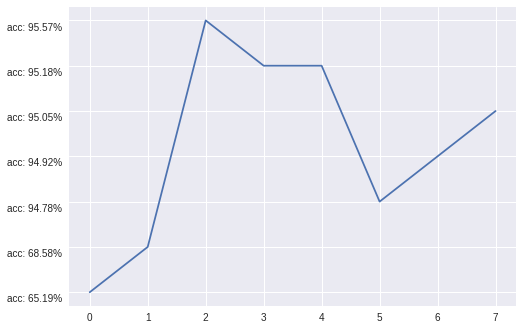

In [32]:
from numpy.random import seed 
from tensorflow import set_random_seed
from sklearn.preprocessing import *
for fun in funct:
  # for reproductivity
  set_random_seed(2)
  seed(7) 
  #feature scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(1050, input_dim=8, kernel_initializer=fun, activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(525, kernel_initializer=fun, activation='tanh'))
  model.add(Dense(125, kernel_initializer=fun, activation='relu'))
  model.add(Dense(1, kernel_initializer=fun, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"kernel_initializer"]=  fun
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

To conclude we can use RandomNormal for initialization.